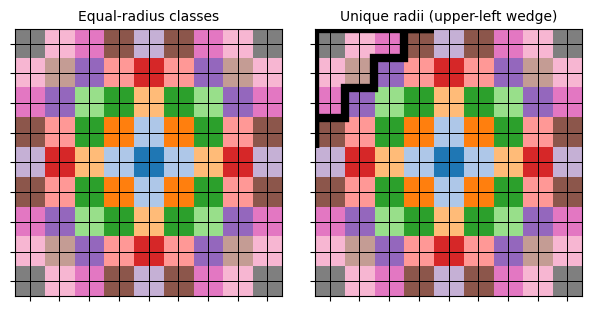

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Polygon

def rings_with_ul_triangle(n=9, lw=6, figsize=(6,3)):
    assert n % 2 == 1
    c = n // 2

    # lattice & radius classes (using r^2 for exact grouping)
    coords = np.arange(-c, c+1)
    X, Y = np.meshgrid(coords, coords, indexing="xy")
    r2 = X**2 + Y**2
    uniq_r2 = np.unique(r2.ravel())
    ring_id = np.searchsorted(uniq_r2, r2)

    # colors
    base = plt.get_cmap("tab20")
    cmap = ListedColormap([base(i % base.N) for i in range(len(uniq_r2))])
    norm = BoundaryNorm(np.arange(len(uniq_r2)+1)-0.5, len(uniq_r2))

    extent = [-0.5, n-0.5, n-0.5, -0.5]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, constrained_layout=True)

    # left: equal-radius coloring
    for ax in (ax1, ax2):
        ax.imshow(ring_id, cmap=cmap, norm=norm, origin="upper", extent=extent)
        ax.set_xticks(np.arange(n)); ax.set_yticks(np.arange(n))
        ax.set_xticklabels([]); ax.set_yticklabels([])
        ax.grid(which="both", color="black", linewidth=0.7)

    ax1.set_title("Equal-radius classes", fontsize=10)
    ax2.set_title("Unique radii (upper-left triangle)", fontsize=10)

    # --- BOLD STAIRCASE TRIANGLE (includes UL corner), reaches center corner ---
    # start on the TOP border at x = c + 0.5, then step (left, down) until y = c + 0.5
    pts = [(-0.5, -0.5),                # top-left outer corner
           (c + 0.5, -0.5)]             # along top border to the staircase start

    x, y = c + 0.5, -0.5
    for _ in range(c + 1):               # c+1 steps to hit y = c + 0.5
        x -= 1.0; pts.append((x, y))     # left step
        y += 1.0; pts.append((x, y))     # down step

    pts.append((-0.5, -0.5))             # back along left border to close

    tri = Polygon(pts, closed=True, fill=False, edgecolor='black',
                  linewidth=lw, joinstyle='miter', capstyle='butt')
    ax2.add_patch(tri)

    plt.show()

if __name__ == "__main__":
    rings_with_ul_triangle(n=9, lw=6)
